1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [2]:
import numpy as np
X = np.array(zp)
y = np.array(ks)

In [3]:
sr = np.mean

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}$$

In [4]:
b = (sr(X*y)-(sr(X)*sr(y)))/(sr(X**2)-sr(X)**2)
b

2.620538882402765

$$a = \overline{y} - b \cdot {\overline{x}}$$

In [5]:
a = sr(y)-b*sr(X)
a

444.1773573243596

$$y = a + bx$$

In [6]:
y_h = a + X*b
y_h

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

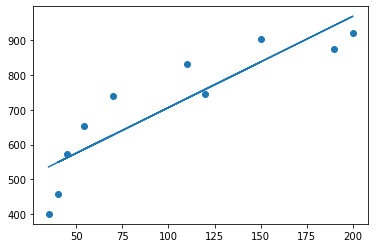

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X, y_h)
plt.show()

Без интерсепта

In [8]:
# У меня порядок умножения с транспонированием изменен, т.к. я использую исходную матрицу-строку,
# а не решейплю ее в матрицу-стобец 
# Не сочтите это за ошибку, и поскольку при перемножении матриц получается число в случае не использования интерсепта, 
# использую вместо обратной матрицы единицу деленную на результат умножения
np.dot(1/np.dot(X, X.T), X@y)

5.889820420132688

2) Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept)

In [9]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2)/n
alpha = 1e-6
B1 = 0.1
n = 10
for i in range (5000):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
print(f'Intercept: {i}, B1 = {B1}, mse={mse_(B1)}')

Intercept: 4999, B1 = 5.889820420132673, mse=56516.85841571943


In [10]:
yii = X*5.88982
yii

array([ 206.1437 ,  265.0419 , 1119.0658 , 1177.964  ,  235.5928 ,
        412.2874 ,  318.05028,  883.473  ,  706.7784 ,  647.8802 ])

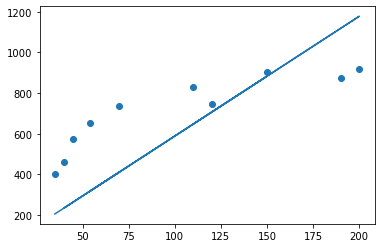

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X, yii)
plt.show()